# Real Data


In [1]:
import popy
from popy.pop_maker import PopMaker
import popy.utils as utils

import pandas as pd

from pathlib import Path

In [2]:
df_pequiv = pd.read_stata("C:/01-main/03-ac135963/Projekte/popy/examples/data/pequiv.dta")
df_pequiv = df_pequiv.rename(columns={"d11101": "age"})

In [3]:
df = df_pequiv

In [4]:
df = df.loc[df["syear"]==2018, ]
df.loc[:,"age"] = pd.to_numeric(df["age"], errors="coerce")
df.dropna(inplace=True)

C:\Users\Marius\AppData\Local\Temp\ipykernel_18604\2656527682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"age"] = pd.to_numeric(df["age"], errors="coerce")
C:\Users\Marius\AppData\Local\Temp\ipykernel_18604\2656527682.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,"age"] = pd.to_numeric(df["age"], errors="coerce")
C:\Users\Marius\AppData\Local\Temp\ipykernel_18604\2656527682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

In [5]:
class Agent(popy.Agent):
    pass

class Home(popy.Location):
    def group(self, agent):
        return agent.hid

In [6]:
class Model(popy.Model):
    def setup(self):
        self.pop_maker = PopMaker(model=self)
        df_sample = self.pop_maker.draw_sample(df=df, n=self.p.n_agents, sample_level="hid")
        self.agents = self.pop_maker.create_agents(df=df_sample, agent_class=Agent)
        self.locations = self.pop_maker.create_locations(agents=self.agents, location_classes=[Home])

In [7]:
parameters = {
    "steps": 1,
    "n_agents": 10000,
}
model = Model(parameters=parameters)
model.run()

Completed: 1 steps
Run time: 0:00:48.868298
Simulation finished


DataDict {
'info': Dictionary with 9 keys
'parameters': 
    'constants': Dictionary with 2 keys
'reporters': DataFrame with 1 variable and 1 row
}

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0001,0.0000
90,0.000000,0.000000,0.000200,0.000200,0.000200,0.000300,0.000000,0.000000,0.000100,0.000200,0.000100,0.000100,0.000000,0.000000,0.000100,0.000200,0.000000,0.0001,0.0002,0.0001
85,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000100,0.000100,0.000100,0.000100,0.000400,0.000000,0.000900,0.001100,0.0016,0.0001,0.0000
80,0.000000,0.000000,0.000000,0.000400,0.000000,0.000400,0.000000,0.000400,0.000200,0.000200,0.000200,0.000500,0.000800,0.000500,0.000500,0.004000,0.007399,0.0011,0.0000,0.0000
75,0.000000,0.000200,0.000400,0.000200,0.000000,0.000000,0.000800,0.000700,0.000400,0.000200,0.000000,0.000800,0.000600,0.001600,0.005999,0.016198,0.004000,0.0009,0.0002,0.0000
70,0.000000,0.000000,0.000000,0.000500,0.000400,0.000300,0.000500,0.000500,0.000900,0.000400,0.000300,0.001300,0.002400,0.006899,0.014999,0.005999,0.000500,0.0000,0.0001,0.0000
65,0.000500,0.001600,0.002000,0.000900,0.000800,0.001600,0.001400,0.002400,0.001000,0.000600,0.002600,0.002200,0.009399,0.022998,0.006899,0.001600,0.000500,0.0004,0.0000,0.0000
60,0.000800,0.000500,0.002200,0.003400,0.005199,0.003500,0.001700,0.001400,0.000200,0.000900,0.003400,0.009599,0.025197,0.009399,0.002400,0.000600,0.000800,0.0001,0.0000,0.0000
55,0.001900,0.001000,0.006799,0.015998,0.014199,0.007599,0.001500,0.001000,0.001400,0.004600,0.011499,0.029197,0.009599,0.002200,0.001300,0.000800,0.000500,0.0001,0.0001,0.0000
50,0.001600,0.006499,0.021198,0.032897,0.023198,0.007499,0.001900,0.001500,0.005699,0.013199,0.034597,0.011499,0.003400,0.002600,0.000300,0.000000,0.000200,0.0001,0.0001,0.0000


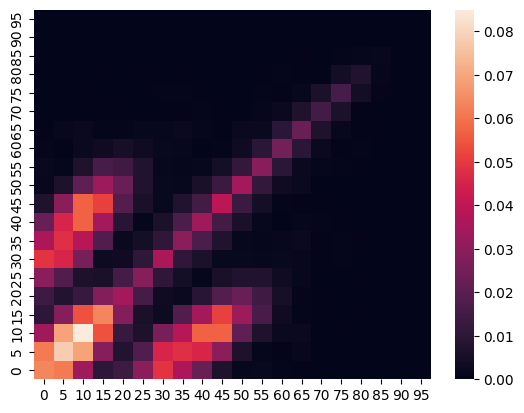

In [8]:
for agent in model.agents:
    agent.age_5 = utils.group_it(value=agent.age, start=0, step=5, n_steps=20, return_value="lower_bound")

utils.create_contact_matrix(agents=model.agents, attr="age_5", plot=True)